In [1]:
#подключение библиотек
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp
import pandas as pd

In [2]:
path = './data'
raw_data = pd.read_csv('data.csv')
def target(wine):
      if wine == 'red':
            return 0
      elif wine == 'white':
            return 1          
raw_data

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,Red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,Red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,Red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         6497 non-null   float64
 1   volatile.acidity      6497 non-null   float64
 2   citric.acid           6497 non-null   float64
 3   residual.sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free.sulfur.dioxide   6497 non-null   float64
 6   total.sulfur.dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [4]:
#представим строковые данные как числовые
import sklearn.preprocessing as preprocessing
number_data = pd.get_dummies(raw_data)
number_data.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,wine_Red,wine_white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,0


<AxesSubplot:>

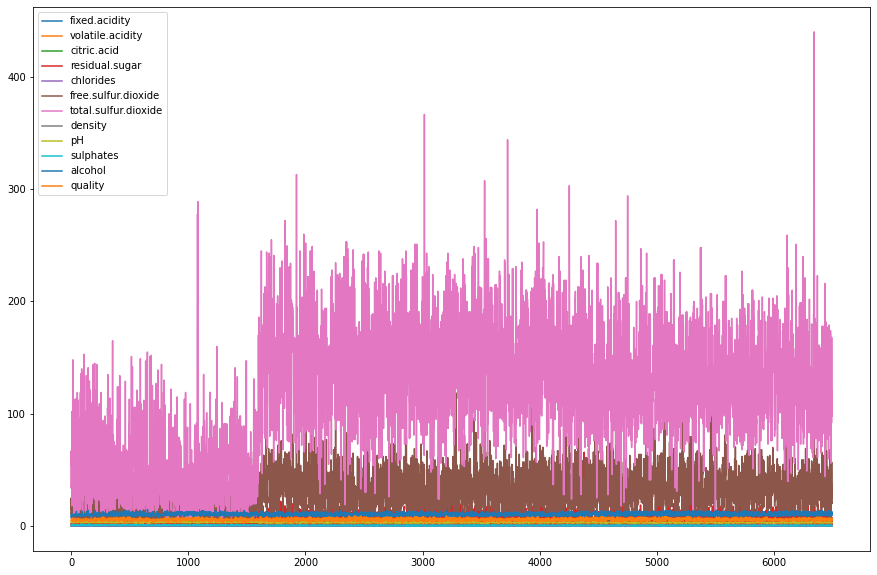

In [5]:
number_data[number_data.columns[:-2]].plot(figsize=(15, 10))

<AxesSubplot:>

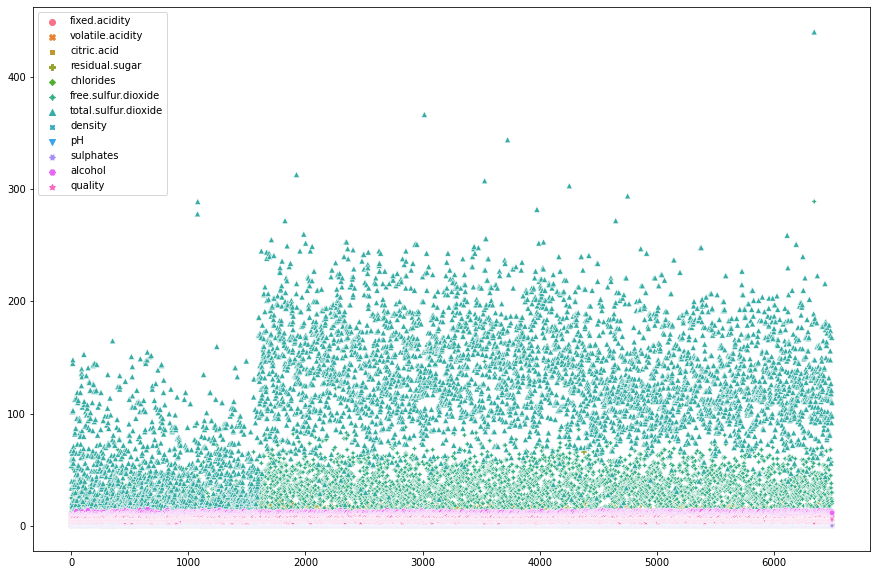

In [6]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=number_data[number_data.columns[:-2]])

In [7]:
mm_scalar = preprocessing.MinMaxScaler()
mm_scalar.fit(number_data)
mm_norm_number_data = pd.DataFrame(columns=number_data.columns, data=mm_scalar.transform(number_data))
mm_norm_number_data.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,wine_Red,wine_white
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.333333,1.0,0.0
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870,0.333333,1.0,0.0
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870,0.333333,1.0,0.0
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.260870,0.500000,1.0,0.0
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.333333,1.0,0.0


<AxesSubplot:>

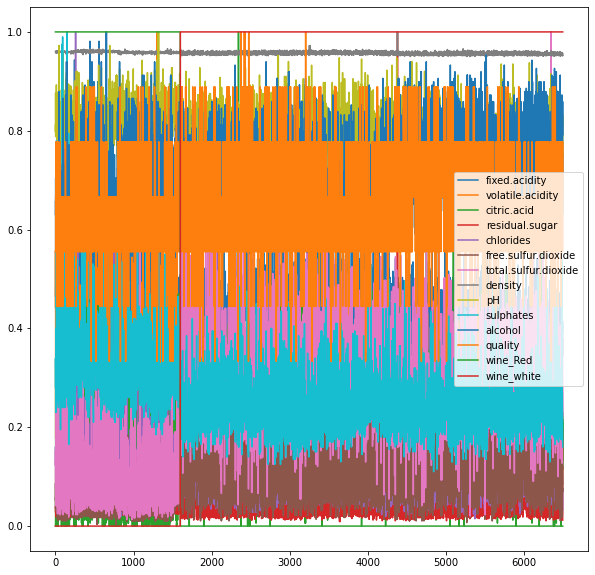

In [8]:
# Данный нормализатор выравнивает данные относительно максимально
ma_scaler = preprocessing.MaxAbsScaler()
ma_scaler.fit(number_data)
ma_norm_data = pd.DataFrame(columns=number_data.columns, data=ma_scaler.transform(number_data))
ma_norm_data.plot(figsize=(10, 10))

<AxesSubplot:>

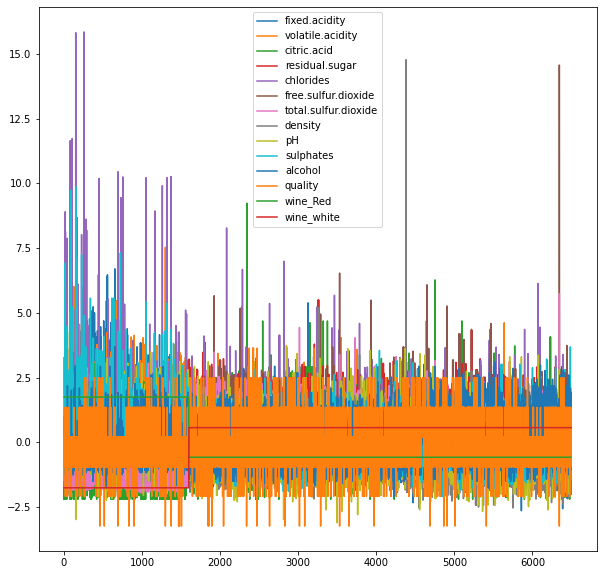

In [9]:
# Нормализация на основе дисперсии и мат. ожидания
std_scaler = preprocessing.StandardScaler()
std_scaler.fit(number_data)
std_norm_data = pd.DataFrame(columns=number_data.columns, data=std_scaler.transform(number_data))
std_norm_data.plot(figsize=(10, 10))

<AxesSubplot:>

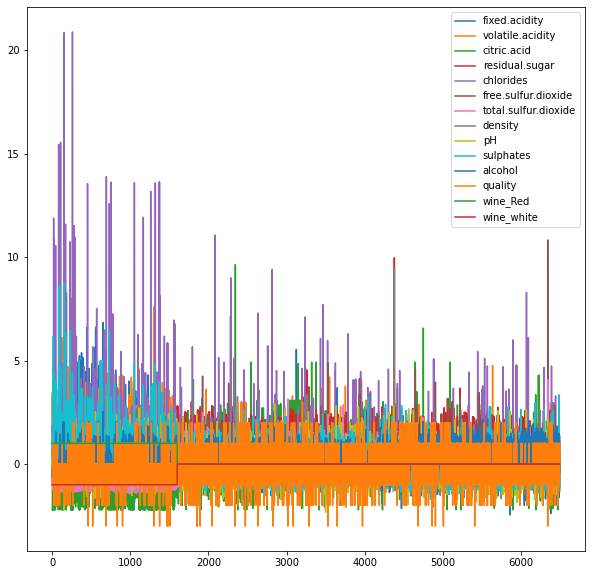

In [10]:
# Нормализация на основе дисперсии и мат. ожидания c удалением выбросов
std_clear_scaler = preprocessing.RobustScaler()
std_clear_scaler.fit(number_data)
std_clear_norm_data = pd.DataFrame(columns=number_data.columns, data=std_clear_scaler.transform(number_data))
std_clear_norm_data.plot(figsize=(10, 10))

In [11]:
from contextlib import contextmanager
from time import time

@contextmanager
def measure_time():
  t = time()
  yield
  print(f'Потрачено времени {time() - t} сек')

def make_meshgrid(x, y, h=.02):
  """Create a mesh of points to plot in

  Parameters
  ----------
  x: data to base x-axis meshgrid on
  y: data to base y-axis meshgrid on
  h: stepsize for meshgrid, optional

  Returns
  -------
  xx, yy : ndarray
  """
  x_min, x_max = x.min() - 1, x.max() + 1
  y_min, y_max = y.min() - 1, y.max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
  return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf(xx, yy)
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [12]:
from sklearn.model_selection import train_test_split

X = mm_norm_number_data[mm_norm_number_data.columns[:-2]]
Y = mm_norm_number_data[mm_norm_number_data.columns[-2:]]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8)

In [13]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras import activations
from keras.optimizer_v2.adam import Adam
from keras.optimizer_v2.rmsprop import RMSProp
# from keras.optimizers import Adam, RMSprop
from keras.losses import categorical_crossentropy
from keras.metrics import categorical_accuracy

In [14]:
Y_train

,wine_Red,wine_white
1822,0.0,1.0
3552,0.0,1.0
3296,0.0,1.0
2845,0.0,1.0
4793,0.0,1.0
...,...,...
2279,0.0,1.0
109,1.0,0.0
6408,0.0,1.0
2566,0.0,1.0


In [15]:
X_train

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
1822,0.223140,0.073333,0.180723,0.003067,0.056478,0.111111,0.317972,0.125120,0.542636,0.095506,0.159420,0.500000
3552,0.355372,0.106667,0.228916,0.056748,0.058140,0.166667,0.382488,0.171390,0.503876,0.292135,0.405797,0.500000
3296,0.256198,0.066667,0.180723,0.021472,0.048173,0.131944,0.423963,0.082707,0.465116,0.084270,0.608696,0.500000
2845,0.347107,0.080000,0.240964,0.070552,0.076412,0.138889,0.370968,0.157895,0.356589,0.101124,0.376812,0.666667
4793,0.157025,0.053333,0.192771,0.009202,0.044850,0.020833,0.191244,0.077116,0.418605,0.146067,0.434783,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...
2279,0.239669,0.133333,0.084337,0.012270,0.056478,0.218750,0.352535,0.094274,0.348837,0.095506,0.289855,0.333333
109,0.355372,0.470000,0.313253,0.021472,0.187708,0.125000,0.338710,0.188741,0.379845,0.264045,0.188406,0.333333
6408,0.181818,0.120000,0.144578,0.010736,0.073090,0.225694,0.331797,0.101986,0.379845,0.224719,0.347826,0.500000
2566,0.247934,0.093333,0.210843,0.259202,0.049834,0.128472,0.338710,0.236939,0.403101,0.112360,0.144928,0.500000


In [16]:
model = Sequential()
model.add(Dense(10, activation=activations.relu, input_dim=X.shape[1])) # input_dim = 4
model.add(Dense(Y.shape[1], activation=activations.softmax)) # output = 3

model.compile(Adam(), categorical_crossentropy, metrics=['acc'])

In [17]:
model.fit(X_train, Y_train, verbose=2, epochs=100, batch_size=3)

Epoch 1/100
1733/1733 - 2s - loss: 0.2906 - acc: 0.8851 - 2s/epoch - 943us/step
Epoch 2/100
1733/1733 - 1s - loss: 0.0822 - acc: 0.9810 - 1s/epoch - 693us/step
Epoch 3/100
1733/1733 - 1s - loss: 0.0600 - acc: 0.9835 - 1s/epoch - 745us/step
Epoch 4/100
1733/1733 - 1s - loss: 0.0526 - acc: 0.9861 - 1s/epoch - 710us/step
Epoch 5/100
1733/1733 - 1s - loss: 0.0481 - acc: 0.9877 - 1s/epoch - 741us/step
Epoch 6/100
1733/1733 - 1s - loss: 0.0443 - acc: 0.9888 - 1s/epoch - 697us/step
Epoch 7/100
1733/1733 - 1s - loss: 0.0418 - acc: 0.9892 - 1s/epoch - 711us/step
Epoch 8/100
1733/1733 - 1s - loss: 0.0395 - acc: 0.9919 - 1s/epoch - 709us/step
Epoch 9/100
1733/1733 - 1s - loss: 0.0385 - acc: 0.9915 - 1s/epoch - 708us/step
Epoch 10/100
1733/1733 - 1s - loss: 0.0366 - acc: 0.9925 - 1s/epoch - 715us/step
Epoch 11/100
1733/1733 - 1s - loss: 0.0356 - acc: 0.9925 - 1s/epoch - 724us/step
Epoch 12/100
1733/1733 - 1s - loss: 0.0349 - acc: 0.9921 - 1s/epoch - 706us/step
Epoch 13/100
1733/1733 - 1s - loss: 0

In [18]:
# для тестовых данных
model.evaluate(X_train, Y_train)

163/163 [==============================] - 0s 843us/step - loss: 0.0117 - acc: 0.9977


[0.011674802750349045, 0.9976909756660461]

In [19]:
# для тренировочных
model.evaluate(X_test, Y_test)

41/41 [==============================] - 0s 994us/step - loss: 0.0316 - acc: 0.9931


[0.03156473487615585, 0.9930769205093384]

In [20]:
X_train.shape, X_test.shape

((5197, 12), (1300, 12))

In [21]:
from keras import callbacks

In [22]:
# Делим
# Делить будем в отношении 80/20
# 80 - это обучение
# 20 - тест
# первым делом перемешаем выборку (надо для того что бы обе выборки были репрезентативными)
XY_data = np.hstack( (X, Y) ).transpose((0,1))
np.random.shuffle(XY_data)
# Делим выборки
point_split = round(XY_data.shape[0] * 0.8)
train_data = XY_data[:point_split]
test_data = XY_data[point_split:]
print(f'Всего данных: {XY_data.shape[0]}')
print(f'Тренировочных данных: {train_data.shape[0]}')
print(f'Тестовых данных: {test_data.shape[0]}')
# Делим все на входные и выходные данные
# Тренировочные
X_train = train_data[:, :X.shape[1] ]
Y_train = train_data[:, -2: ]
print(f'Размер данные для тренировки (входных): {X_train.shape}')
print(f'Размер данные для тренировки (выходных): {Y_train.shape}')

# Тестовые
X_test = test_data[:, :X.shape[1] ]
Y_test = test_data[:, -2: ]
print(f'Размер данные для теста (входных): {X_test.shape}')
print(f'Размер данные для теста (выходных): {Y_test.shape}')

Всего данных: 6497
Тренировочных данных: 5198
Тестовых данных: 1299
Размер данные для тренировки (входных): (5198, 12)
Размер данные для тренировки (выходных): (5198, 2)
Размер данные для теста (входных): (1299, 12)
Размер данные для теста (выходных): (1299, 2)


In [23]:
def make_nn(input_len, output_len):
    model = Sequential()
    model.add(Dense(10, activation=activations.relu, input_dim=input_len))
    model.add(Dense(output_len, activation=activations.softmax))
    model.compile(Adam(), categorical_crossentropy, metrics=['acc'])
    return model

model = make_nn(X_train.shape[1], Y_train.shape[1])
print('Начинаем обучение сети')
history = model.fit(
    x=X_train,
    y=Y_train,
    batch_size=14,
    epochs=300,
    verbose=0,
    validation_data=(X_test, Y_test),
    callbacks=[
        callbacks.History(),
    ]  
)

Начинаем обучение сети


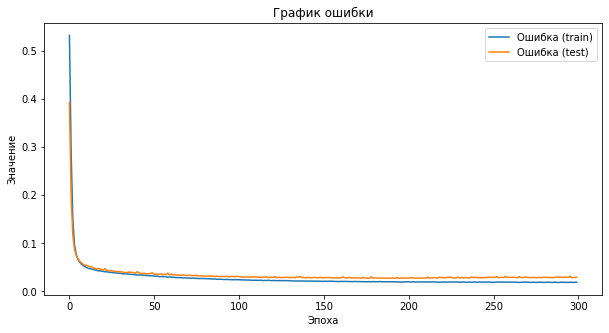

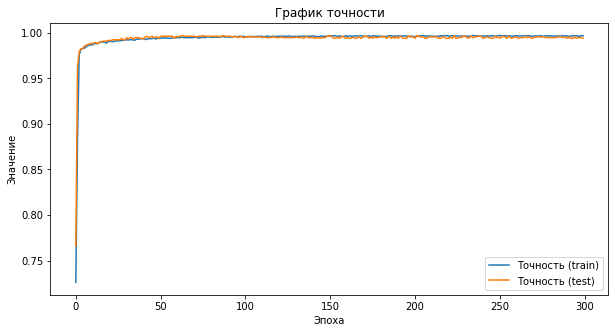

In [24]:
plt.figure(0, figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('График ошибки')
plt.ylabel('Значение')
plt.xlabel('Эпоха')
plt.legend(['Ошибка (train)', 'Ошибка (test)']);

plt.figure(1, figsize=(10,5))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('Значение')
plt.xlabel('Эпоха')
plt.title('График точности')
plt.legend(['Точность (train)', 'Точность (test)']);

In [25]:
model = make_nn(X.shape[1], Y.shape[1])

print('Начинаем обучение сети')
history = model.fit(
    x=X,
    y=Y,
    batch_size=15,
    epochs=100,
    verbose=1,
#     Вот это разделения данных в соотношении 80/20
    validation_split=0.2,
    callbacks=[
        callbacks.History(),
    ]
    
)

Начинаем обучение сети
Epoch 1/100
347/347 [==============================] - 1s 2ms/step - loss: 0.5649 - acc: 0.7277 - val_loss: 0.2989 - val_acc: 0.9908
Epoch 2/100
347/347 [==============================] - 0s 1ms/step - loss: 0.3052 - acc: 0.9292 - val_loss: 0.1386 - val_acc: 0.9838
Epoch 3/100
347/347 [==============================] - 0s 1ms/step - loss: 0.1581 - acc: 0.9754 - val_loss: 0.0919 - val_acc: 0.9823
Epoch 4/100
347/347 [==============================] - 0s 1ms/step - loss: 0.1093 - acc: 0.9810 - val_loss: 0.0728 - val_acc: 0.9831
Epoch 5/100
347/347 [==============================] - 0s 1ms/step - loss: 0.0877 - acc: 0.9819 - val_loss: 0.0438 - val_acc: 0.9854
Epoch 6/100
347/347 [==============================] - 0s 1ms/step - loss: 0.0766 - acc: 0.9829 - val_loss: 0.0445 - val_acc: 0.9854
Epoch 7/100
347/347 [==============================] - 0s 1ms/step - loss: 0.0690 - acc: 0.9836 - val_loss: 0.0520 - val_acc: 0.9846
Epoch 8/100
347/347 [=========================

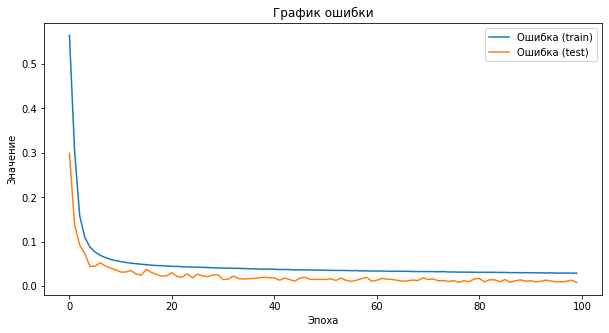

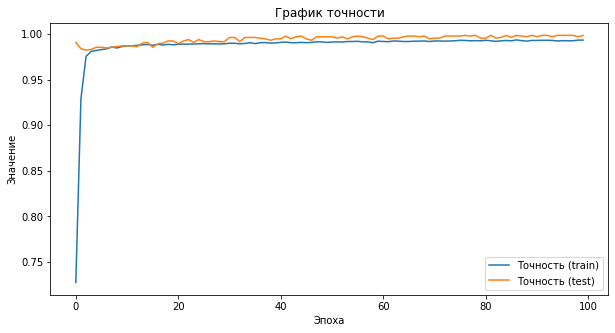

In [26]:
plt.figure(0, figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('График ошибки')
plt.ylabel('Значение')
plt.xlabel('Эпоха')
plt.legend(['Ошибка (train)', 'Ошибка (test)']);

plt.figure(1, figsize=(10,5))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('Значение')
plt.xlabel('Эпоха')
plt.title('График точности')
plt.legend(['Точность (train)', 'Точность (test)']);

In [27]:
model = make_nn(X.shape[1], Y.shape[1])

print('Начинаем обучение сети')
history = model.fit(
    x=X,
    y=Y,
    batch_size=5,
#     Так как у нас теперь есть рання остановка мы можем увеличеть количество эпох (было 100 стало 300)
    epochs=300,
    verbose=1,
#     Вот это разделения данных в соотношении 80/20
    validation_split=0.2,
    callbacks=[
        callbacks.History(),
        callbacks.EarlyStopping(
#             На основе какого значения будет приниматься решеня об остановке
            monitor='val_acc',
#             Указываем направления лучшего значения (min, max, auto) лучшим является если тестовая точноть будет максимальной
            mode='max',
#             Количество эпок в резельтате которых если значение не изменилось, то произвести остановку
            patience=5,
#             "Чуствительность" метода - изменения ниже данного значения дубут считатья 0 (изменения в отслеживаемом значении нету)
            min_delta=0.001,
        )
    ]
    
)

Начинаем обучение сети
Epoch 1/300
1040/1040 [==============================] - 2s 1ms/step - loss: 0.3539 - acc: 0.8726 - val_loss: 0.1416 - val_acc: 0.9762
Epoch 2/300
1040/1040 [==============================] - 1s 1ms/step - loss: 0.1083 - acc: 0.9773 - val_loss: 0.0638 - val_acc: 0.9831
Epoch 3/300
1040/1040 [==============================] - 1s 1ms/step - loss: 0.0742 - acc: 0.9811 - val_loss: 0.0636 - val_acc: 0.9808
Epoch 4/300
1040/1040 [==============================] - 1s 1ms/step - loss: 0.0630 - acc: 0.9838 - val_loss: 0.0406 - val_acc: 0.9854
Epoch 5/300
1040/1040 [==============================] - 1s 1ms/step - loss: 0.0573 - acc: 0.9838 - val_loss: 0.0393 - val_acc: 0.9862
Epoch 6/300
1040/1040 [==============================] - 1s 1ms/step - loss: 0.0535 - acc: 0.9860 - val_loss: 0.0340 - val_acc: 0.9862
Epoch 7/300
1040/1040 [==============================] - 1s 1ms/step - loss: 0.0504 - acc: 0.9867 - val_loss: 0.0499 - val_acc: 0.9823
Epoch 8/300
1040/1040 [=========

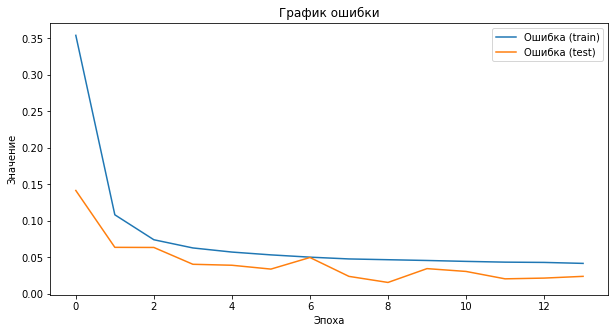

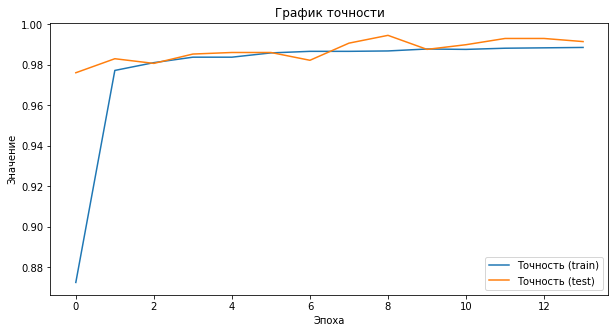

In [28]:
plt.figure(0, figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('График ошибки')
plt.ylabel('Значение')
plt.xlabel('Эпоха')
plt.legend(['Ошибка (train)', 'Ошибка (test)']);

plt.figure(1, figsize=(10,5))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('Значение')
plt.xlabel('Эпоха')
plt.title('График точности')
plt.legend(['Точность (train)', 'Точность (test)']);

In [29]:
from pathlib import Path
from os import remove

In [30]:
# создадим функцию создания о очисти каталога контрольных точек
# указываем шаблон имени фала контрольной точки
file_name = 'model__fds.hdf5'
def make_save_points(name='save_points', file_name=file_name):
#     выбираем катагол (подробнее https://docs.python.org/3.6/library/pathlib.html ) 
    checkpoints_dir = Path('./').joinpath('save_points')
    print(f'Текущий каталог с контрольными точками {checkpoints_dir.absolute()}')
    # Создаем каталог если его нету
    checkpoints_dir.mkdir(exist_ok=True)
    # Удаляем все из каталога
    for item in checkpoints_dir.iterdir():
        if item.is_file():
            print(f'Удаляем файл {item}')
            remove(item)
    return str(checkpoints_dir.joinpath(file_name))

In [34]:
print('Начинаем обучение сети')
history = make_nn(X.shape[1], Y.shape[1]).fit(
    x=X,
    y=Y,
    batch_size=3,
    epochs=100,
    validation_split=0.2,
    verbose=1,
    callbacks=[
        callbacks.History(),
        # Добавляем сценарий ранней остановки
        # Если в течении 30 эпох точность не вырастить более чем на 1%, то произойдет остановка
        callbacks.EarlyStopping(
            monitor='val_acc',
            mode='max',
            patience=50,
            min_delta=0.01
        ),
#         Callback сохранений состояний сети
        callbacks.ModelCheckpoint(
#             Указываем путь для сохранения и формат имен файлов
            make_save_points(file_name='1'+file_name),
#             Указываем какое значение отслеживать
            monitor='val_acc',
#             Указываем, что сохранять надо только лучшие результаты
            save_best_only=True,
#             Говорим как часто проверять, что текущий результат лучше предидущего (в эпохах)
            save_freq='epoch',
#             Указываем сторону лучших значений
            mode='max'
        )
    ]
)

Начинаем обучение сети
Текущий каталог с контрольными точками c:\Users\User\Desktop\lb3\save_points
Удаляем файл save_points\2model__fds.hdf5
Epoch 1/100
1733/1733 [==============================] - 3s 1ms/step - loss: 0.2660 - acc: 0.9061 - val_loss: 0.0881 - val_acc: 0.9823
Epoch 2/100
1733/1733 [==============================] - 2s 1ms/step - loss: 0.0871 - acc: 0.9806 - val_loss: 0.0428 - val_acc: 0.9854
Epoch 3/100
1733/1733 [==============================] - 2s 1ms/step - loss: 0.0681 - acc: 0.9823 - val_loss: 0.0294 - val_acc: 0.9900
Epoch 4/100
1733/1733 [==============================] - 2s 1ms/step - loss: 0.0605 - acc: 0.9852 - val_loss: 0.0291 - val_acc: 0.9892
Epoch 5/100
1733/1733 [==============================] - 2s 1ms/step - loss: 0.0567 - acc: 0.9852 - val_loss: 0.0409 - val_acc: 0.9846
Epoch 6/100
1733/1733 [==============================] - 2s 1ms/step - loss: 0.0545 - acc: 0.9871 - val_loss: 0.0326 - val_acc: 0.9869
Epoch 7/100
1733/1733 [=========================

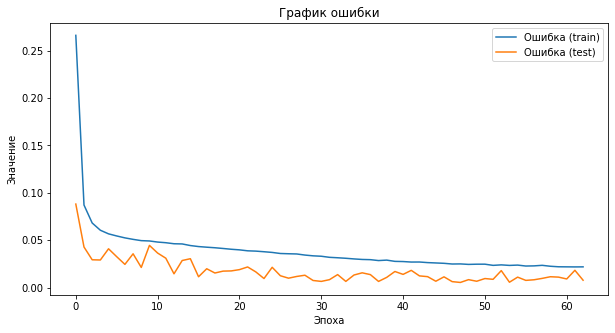

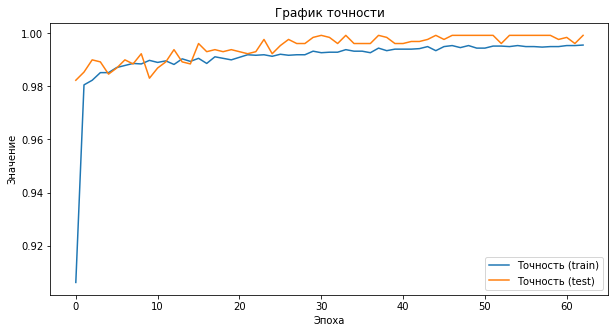

In [35]:
plt.figure(0, figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('График ошибки')
plt.ylabel('Значение')
plt.xlabel('Эпоха')
plt.legend(['Ошибка (train)', 'Ошибка (test)']);

plt.figure(1, figsize=(10,5))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('Значение')
plt.xlabel('Эпоха')
plt.title('График точности')
plt.legend(['Точность (train)', 'Точность (test)']);

In [38]:
from keras.models import load_model

# Загружаем контрольную точку (модель)
# Обратите внимание путь до контрольной точки может отличатся
loaded_model = load_model('C:/Users/User/Desktop/lb3/save_points/1model__fds.hdf5')

# Прдсказываем класс
print(f'Точность предсказания на тренировочных данных {loaded_model.evaluate(X_train, Y_train)[1]}')
print(f'Точность предсказания на тестовых данных {loaded_model.evaluate(X_test, Y_test)[1]}')
predict = loaded_model.predict(X_test)
predict

163/163 [==============================] - 0s 1ms/step - loss: 0.0289 - acc: 0.9929
Точность предсказания на тренировочных данных 0.9928818941116333
41/41 [==============================] - 0s 913us/step - loss: 0.0306 - acc: 0.9931
Точность предсказания на тестовых данных 0.9930716156959534


array([[1.7657578e-03, 9.9823427e-01],
       [6.1171158e-04, 9.9938822e-01],
       [9.5913893e-01, 4.0861018e-02],
       ...,
       [6.6826592e-04, 9.9933165e-01],
       [7.0801014e-03, 9.9291986e-01],
       [9.9956554e-01, 4.3448468e-04]], dtype=float32)

In [39]:
# Прдсказываем вероятности для классов
loaded_model.predict(X_train).argmax(axis=1)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

(6497, 2)


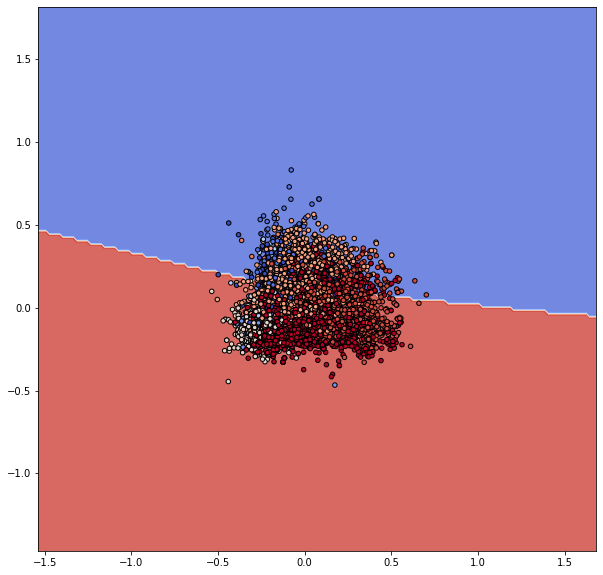

In [40]:
from sklearn.decomposition import PCA

# Задаем ту модель, которую будем использовать для рисования графика
model_clf = loaded_model

pca = PCA(n_components=2)

_X = pca.fit_transform(X)
print(_X.shape)

clf_predict = lambda xx, yy: model_clf.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()])).argmax(axis=1)

X0, X1 = _X[:, 0], _X[:, 1]
xx, yy = make_meshgrid(X0, X1)

clf_predict(xx, yy)

fig, ax = plt.subplots(1,1, figsize=(10, 10))
plot_contours(ax, clf_predict, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=X.apply(lambda x: x.argmax(), axis=1), cmap=plt.cm.coolwarm, s=20, edgecolors='k')